# Decision Tree Exercises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare

# Acquire

In [2]:
# Acquire Step
df = acquire.get_titanic_data()
df.head(2)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


# Prepare

In [3]:
df = prepare.prep_titanic_data(df)
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,3
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,3
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,3
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_id     891 non-null    int64  
 1   survived         891 non-null    int64  
 2   pclass           891 non-null    int64  
 3   sex              891 non-null    object 
 4   age              714 non-null    float64
 5   sibsp            891 non-null    int64  
 6   parch            891 non-null    int64  
 7   fare             891 non-null    float64
 8   embarked         891 non-null    object 
 9   class            891 non-null    object 
 10  embark_town      891 non-null    object 
 11  alone            891 non-null    int64  
 12  embarked_encode  891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 97.5+ KB


In [5]:
df.age = df.age.fillna(df.age.mean())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_id     891 non-null    int64  
 1   survived         891 non-null    int64  
 2   pclass           891 non-null    int64  
 3   sex              891 non-null    object 
 4   age              891 non-null    float64
 5   sibsp            891 non-null    int64  
 6   parch            891 non-null    int64  
 7   fare             891 non-null    float64
 8   embarked         891 non-null    object 
 9   class            891 non-null    object 
 10  embark_town      891 non-null    object 
 11  alone            891 non-null    int64  
 12  embarked_encode  891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 97.5+ KB


In [7]:
df = df.drop(columns=['pclass', 'embarked', 'embarked_encode', 'passenger_id'])

In [8]:
df = pd.get_dummies(df, ['sex', 'class', 'embark_town'], drop_first=True)
df.head()

,survived,age,sibsp,parch,fare,alone,sex_male,class_Second,class_Third,embark_town_Other,embark_town_Queenstown,embark_town_Southampton
0,0,22.0,1,0,7.2500,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,1,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,1,0,1,0,0,1


In [9]:
train, validate, test = prepare.split(df, stratify_by='survived')

In [10]:
X_train = train.drop(columns=["survived"])
y_train = train.survived

X_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

X_test = test.drop(columns=["survived"])
y_test = test.survived

In [11]:
X_train.head()

,age,sibsp,parch,fare,alone,sex_male,class_Second,class_Third,embark_town_Other,embark_town_Queenstown,embark_town_Southampton
583,36.000000,0,0,40.1250,1,1,0,0,0,0,0
165,9.000000,0,2,20.5250,0,1,0,1,0,0,1
50,7.000000,4,1,39.6875,0,1,0,1,0,0,1
259,50.000000,0,1,26.0000,0,0,1,0,0,0,1
306,29.699118,0,0,110.8833,1,0,0,0,0,0,0


In [12]:
y_train[:5]

583    0
165    1
50     0
259    1
306    1
Name: survived, dtype: int64

## Question 1: All About That Base(line)

What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [13]:
y_train[0:10]

583    0
165    1
50     0
259    1
306    1
308    0
314    0
883    0
459    0
180    0
Name: survived, dtype: int64

In [14]:
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [15]:
# The mode is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.62


## Question 2: Fit-Transform
Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [16]:
# Make the model
tree1 = DecisionTreeClassifier(max_depth=3, random_state=123)

# Fit the model (on train and only train)
tree1 = tree1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree1.predict(X_train)

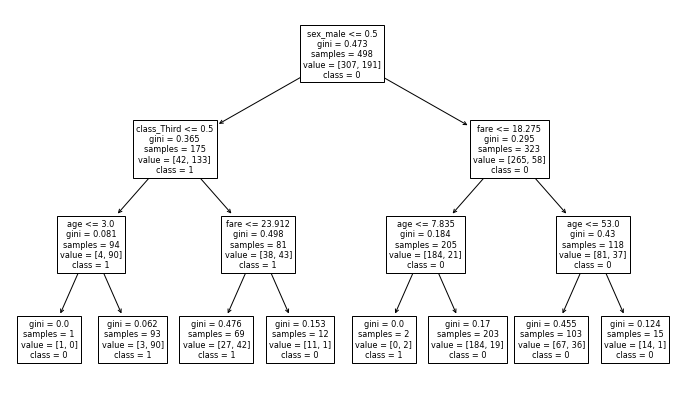

In [17]:
plt.figure(figsize=(12, 7))
plot_tree(tree1, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

## Question 3: Evaluate Performance
Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [18]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.83


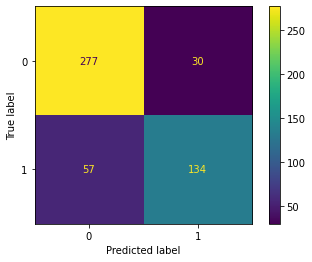

In [19]:
plot_confusion_matrix(tree1, X_train, y_train)

In [20]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.82      0.70      0.75       191

    accuracy                           0.83       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.83      0.82       498



In [21]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report)

Tree of 1 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.829341,0.817073,0.825301,0.823207,0.824636
recall,0.902280,0.701571,0.825301,0.801925,0.825301
f1-score,0.864275,0.754930,0.825301,0.809602,0.822337
support,307.000000,191.000000,0.825301,498.000000,498.000000


## Question 4: Just for Fun - Calculate Metrics
Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [22]:
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()

The label of positive and negative is arbitrary. What is sklearn considering to be the positive case here?

In [23]:
TN, FP, FN, TP

(277, 30, 57, 134)

In [24]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 307
Positive Cases: 191
0    307
1    191
Name: survived, dtype: int64


**Sklearn is calling survival (1) our positive case**

In [25]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.8253012048192772 

True Positive Rate/Sensitivity/Recall/Power: 0.7015706806282722 

False Positive Rate/False Alarm Ratio/Fall-out: 0.09771986970684039 

True Negative Rate/Specificity/Selectivity: 0.9022801302931596 

False Negative Rate/Miss Rate: 0.29842931937172773 

Precision/PPV: 0.8170731707317073 

F1 Score: 0.7549295774647887 

Support (0): 307 

Support (1): 191


## Question 5: Finding Optimal `max_depth`
Run through steps 2-4 using a different max_depth value.



In [26]:
# Let's get loopy
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"
          Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.829341    0.817073  0.825301    0.823207      0.824636
recall       0.902280    0.701571  0.825301    0.801925      0.825301
f1-score     

## Question 6: Further Evaluation
Which model performs better on your in-sample data?

In [ ]:
# Max depth of 15+ produces the highest accuracy

## Question 7: Validation
Which model performs best on your out-of-sample data, the validate set?

In [27]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.799197,0.761682,0.037515
1,2,0.799197,0.761682,0.037515
2,3,0.825301,0.799065,0.026236
3,4,0.835341,0.794393,0.040949
4,5,0.853414,0.803738,0.049675
5,6,0.865462,0.785047,0.080415
6,7,0.877510,0.747664,0.129846
7,8,0.897590,0.771028,0.126562
8,9,0.923695,0.771028,0.152667
9,10,0.937751,0.775701,0.162050


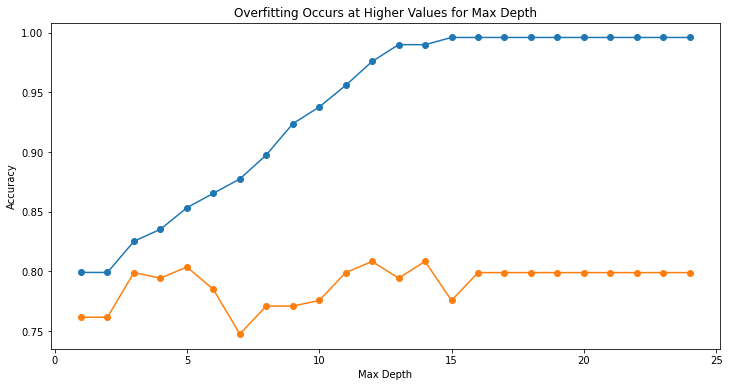

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [29]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

,max_depth,train_accuracy,validate_accuracy,difference
4,5,0.853414,0.803738,0.049675
2,3,0.825301,0.799065,0.026236
3,4,0.835341,0.794393,0.040949
5,6,0.865462,0.785047,0.080415
0,1,0.799197,0.761682,0.037515
1,2,0.799197,0.761682,0.037515
